# Group 5 Final Presentation:

## _Spam E-Mail Detection and Prevention_

> Outline:
>
> 0. Importing Librares and Preparing the Dataset
> 1. Architecting Two Competing Models
> 2. Comparision of Results
> 3. Conclusions

By: Andres Balderrama, Hunter Fountain, Juan Miranda, Parker Hinrichs

# Section 0

## Importing Libraries and Preparing the Dataset

Some description...

In [3]:
# Default libraries used in both models.
import pandas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [4]:
# Load and prepare the data for manipulation.

# Load in data with Latin-1 encoding for special characters.
df = pandas.read_csv("spam_Emails_data.csv", encoding = 'latin-1')

# Relabel column names.
df.rename(columns = {'label': 'Type', 'text': 'Text'}, inplace = True)

# Convert type to binary values.
df['Type'] = df['Type'].map({'Ham': 0, 'Spam': 1})

# Replace NaN in dataset with a ' ' .
df = df.fillna(' ')

# List first 5 elements.
df.head(5)

,Type,Text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [5]:
# Convert text into a sparse matrix of token counts using 
# `CountVectorizer()`. This is also known as converting the text into 
# numbers, which is what the models actually use.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Type']

In [6]:
# Split the data into training and testing set. 75% of the data is 
# allocated for training and 25% is allocated for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.25, random_state = 42)

# Section 1

## Architecting Two Competing Models

Some description...

## Section 1.1

### Naive Bayes "Architecture"

Some description...

In [7]:
# Import `MultinomialNB()` method.
from sklearn.naive_bayes import MultinomialNB

# Create and train the multinomial naive bayes model.
naiBayModel = MultinomialNB()
naiBayModel.fit(X_train, y_train)

MultinomialNB()

## Section 1.2

### Logistical Regession "Architecture"

Some description...

In [8]:
# Import `LogisticRegression()` method.
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model. 
linRegModel = LogisticRegression(random_state = 42, max_iter=50000)
linRegModel.fit(X_train, y_train)

LogisticRegression(max_iter=50000, random_state=42)

# Section 2

## Comparision and Evaluation of Results

After running both of the models, let's see which performed better when given the same dataset.

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [15]:
# Multinomial Naive Bayes model evalution.
naiBayPred = naiBayModel.predict(X_test)

print("Accuracy:\n", accuracy_score(y_test, naiBayPred))
print("F1 score:\n", f1_score(y_test, naiBayPred))
print("Precision score:\n", precision_score(y_test, naiBayPred))
print("Recall score:\n", recall_score(y_test, naiBayPred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, naiBayPred))

Accuracy:
 0.9643852010812373
F1 score:
 0.9613455164382334
Precision score:
 0.9820636010066346
Recall score:
 0.9414835285344563


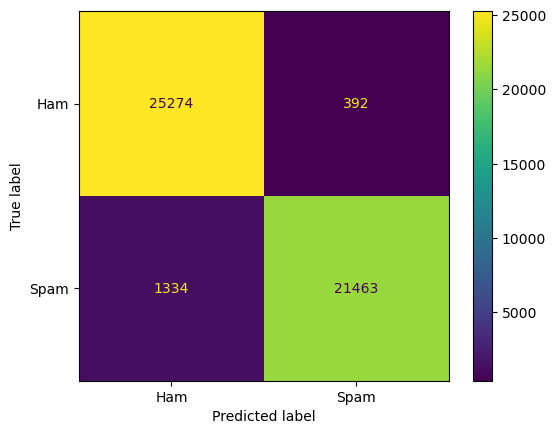

In [11]:
naiBayMatrix = confusion_matrix(y_test, naiBayPred)
displayMatrix = metrics.ConfusionMatrixDisplay(confusion_matrix = naiBayMatrix, display_labels = ['Ham', 'Spam'])
displayMatrix.plot()
plt.show()

In [13]:
# Evalutate Linear Regression model by comparing
linRegPred = linRegModel.predict(X_test)


print("Accuracy:", accuracy_score(y_test, linRegPred))

#print("F1 score:\n", f1_score(y_test, naiBayPrediction))
#print("Precision score:\n", precision_score(y_test, y_pred))
#print("Recall score:\n", recall_score(y_test, naiBayPrediction))
#print("F1 score:\n", f1_score(y_test, naiBayPrediction))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9853083795885521


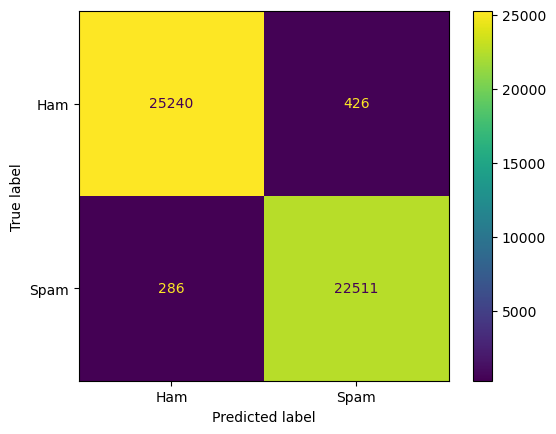

In [16]:
linRegMatrix = confusion_matrix(y_test, linRegPred)
displayMatrix = metrics.ConfusionMatrixDisplay(confusion_matrix = linRegMatrix, display_labels = ['Ham', 'Spam'])
displayMatrix.plot()
plt.show()

# Section 3

## Conclusions on Entire Project

Some description... (2-3 paragraphs)